# 🧭 Optimización de Rutas de Entrega – EcoDelivery S.A.C.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear el grafo con pesos (distancia en km y tiempo en minutos)
G = nx.DiGraph()
G.add_edge('A', 'B', distancia=5, tiempo=10)
G.add_edge('A', 'C', distancia=3, tiempo=6)
G.add_edge('B', 'D', distancia=4, tiempo=8)
G.add_edge('B', 'E', distancia=2, tiempo=4)
G.add_edge('C', 'F', distancia=8, tiempo=12)
G.add_edge('E', 'F', distancia=3, tiempo=5)

# Posiciones fijas para visualización
pos = nx.spring_layout(G, seed=42)


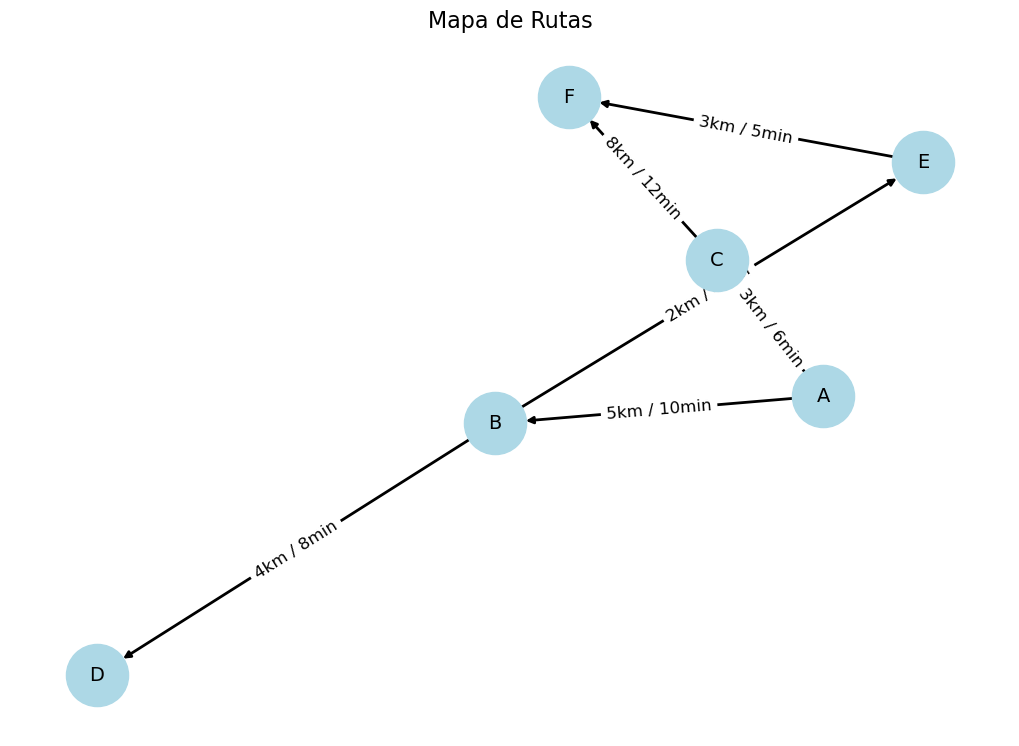

In [2]:
# Función para mostrar el grafo
def dibujar_grafo(con_camino=None, key='distancia', titulo='Mapa de Rutas'):
    plt.figure(figsize=(10, 7))
    edge_labels = {(u, v): f"{d['distancia']}km / {d['tiempo']}min" for u, v, d in G.edges(data=True)}
    colores = ['lightgreen' if con_camino and (u, v) in con_camino else 'black' for u, v in G.edges()]
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=14, arrows=True, edge_color=colores, width=2)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    plt.title(titulo, fontsize=16)
    plt.show()

# Mostrar el grafo inicial
dibujar_grafo()


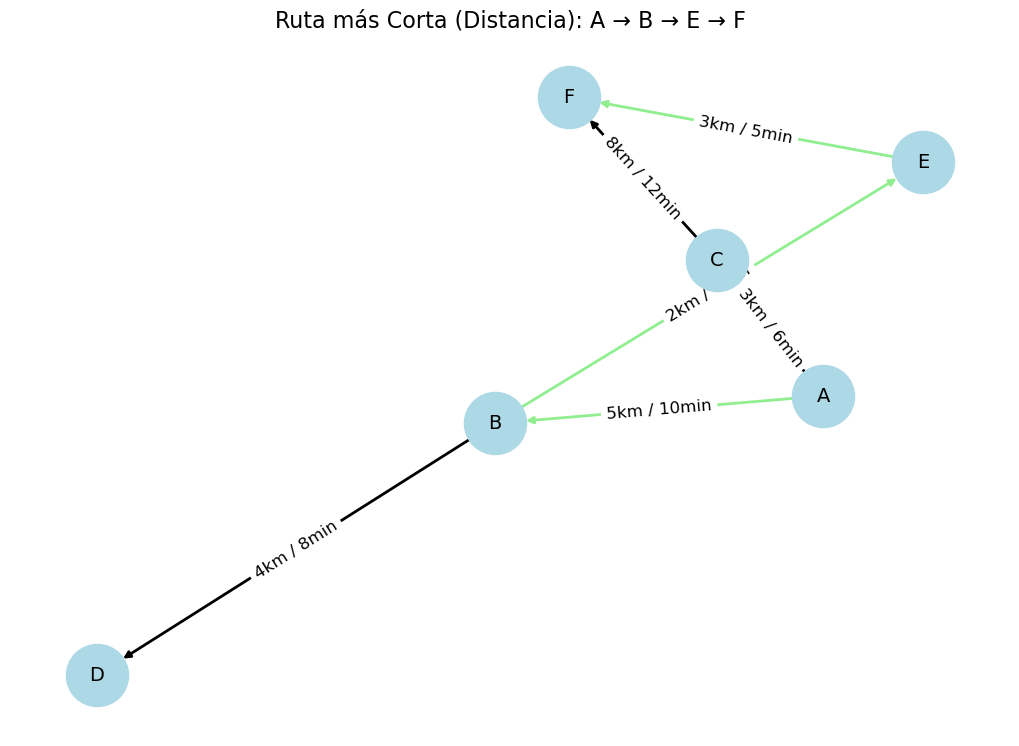

In [3]:
# Calcular camino más corto en DISTANCIA
ruta_dist = nx.shortest_path(G, source='A', target='F', weight='distancia')
aristas_dist = list(zip(ruta_dist[:-1], ruta_dist[1:]))
dibujar_grafo(aristas_dist, key='distancia', titulo=f"Ruta más Corta (Distancia): {' → '.join(ruta_dist)}")


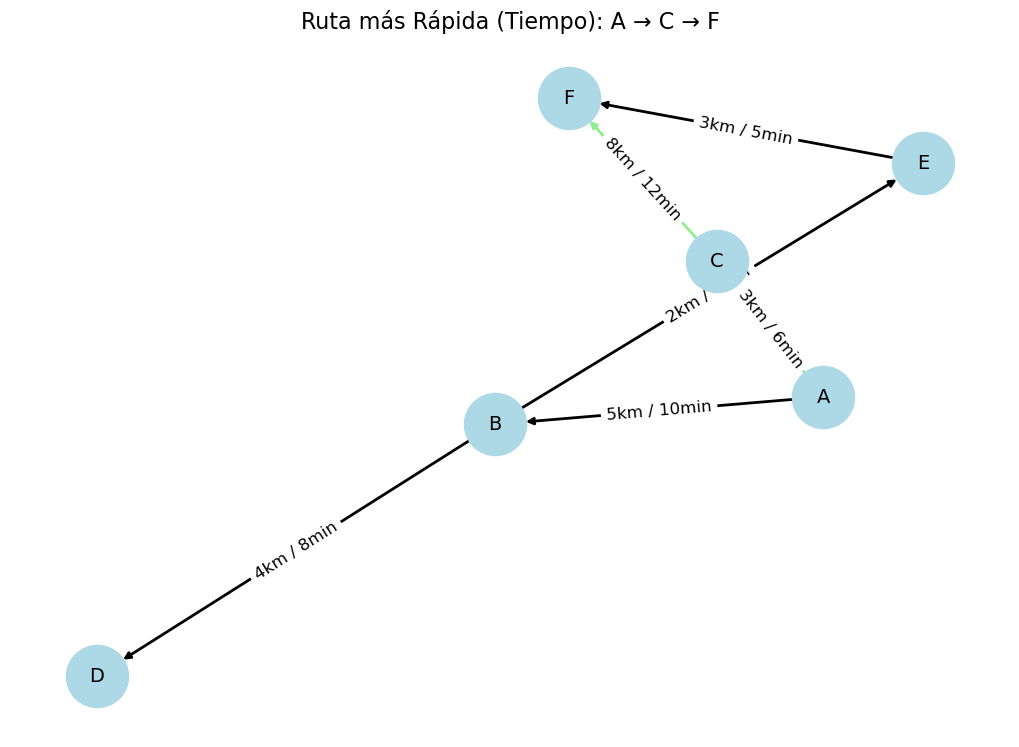

In [4]:
# Calcular camino más rápido en TIEMPO
ruta_tiempo = nx.shortest_path(G, source='A', target='F', weight='tiempo')
aristas_tiempo = list(zip(ruta_tiempo[:-1], ruta_tiempo[1:]))
dibujar_grafo(aristas_tiempo, key='tiempo', titulo=f"Ruta más Rápida (Tiempo): {' → '.join(ruta_tiempo)}")
